# COMP1032 Coursework (2023-2024) Project Titanic

### Data Analysis

<b>Preliminary</b>: Load the titanic dataset and display some samples of the dataset. Show the full set of attributes of the dataset. [4 marks]

In [1]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# convert string to int
from sklearn.preprocessing import LabelEncoder 

# decision tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# neural network
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np

df = pd.read_excel(r"C:\Users\zhiwe\OneDrive\Documents\_FAI\cw\data-Titanic.xlsx")
df_ids = df["PassengerId"]

In [2]:
print('Information of dataset: \n')
df.info()

print('-'*100)

print('\nOverview of dataset: \n')
df.head() 


Information of dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------------------------------------------------------------------

Overview of dataset: 



,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
number_column = len(df.columns)
print('Columns included in dataset: ', number_column)

print('The below are the column values included in dataset: ')

df.columns.values


Columns included in dataset:  12
The below are the column values included in dataset: 


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype=object)

There are total of 891 entries with 12 columns of values ('PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked')

<b>Question 1</b>: Are there more passengers in the first class than those in the second class? Plot the comparison using appropriate method to support your answer. [6 marks]

In [5]:
passenger_pclass = df.groupby(["Pclass"]).size()
print(passenger_pclass)

Pclass
1    216
2    184
3    491
dtype: int64


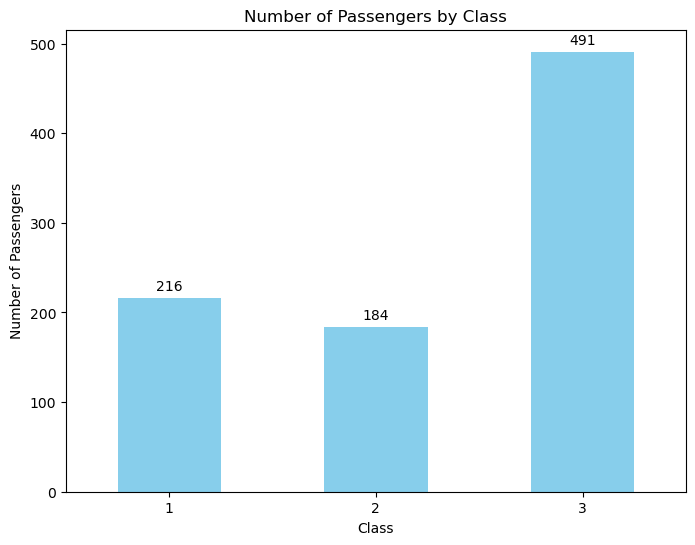

In [6]:
# bar chart to compare the number of passengers in each class
plt.figure(figsize=(8,6)) #declaring the graph size
passenger_pclass.plot(kind='bar', color='skyblue') #declaring graph type and color

# adding annotations to the bars
for i, val in enumerate(passenger_pclass): #loops in each element of 'passenger_pclass'
    plt.text(i, val + 5, str(val), ha='center', va='bottom')  
    # writes the responding annotations (i) on top of the bar (val +5) 
    # which is horizontally centered and anchored at the bottom, respectively
    
plt.title('Number of Passengers by Class')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0) #adjust x label properly
plt.show()

<b>Conclusion Q1</b>

There are more passengers in first class (216 passengers) compared to second class (184 passengers).

<b>Question 2</b>: What's the survival rate for male and female passengers? [6 marks]

In [7]:
print('Calculating survival count by gender: ')
print('Dead == 0; Survived == 1\n')

# survival count by gender
survival_count_gender = df.groupby(['Gender','Survived'])['Survived'].count().unstack() 
#group 'gender' and 'survival' together, then count
print(survival_count_gender)


print('\nCalculating survival rate by gender: ')
print('Dead == 0; Survived == 1\n')

#calculating percentage of survival rate by gender
survival_rate_gender = (survival_count_gender.div(survival_count_gender.sum(axis=1),axis=0)*100).round(2) 
print(survival_rate_gender)

Calculating survival count by gender: 
Dead == 0; Survived == 1

Survived    0    1
Gender            
female     81  233
male      468  109

Calculating survival rate by gender: 
Dead == 0; Survived == 1

Survived      0      1
Gender                
female    25.80  74.20
male      81.11  18.89


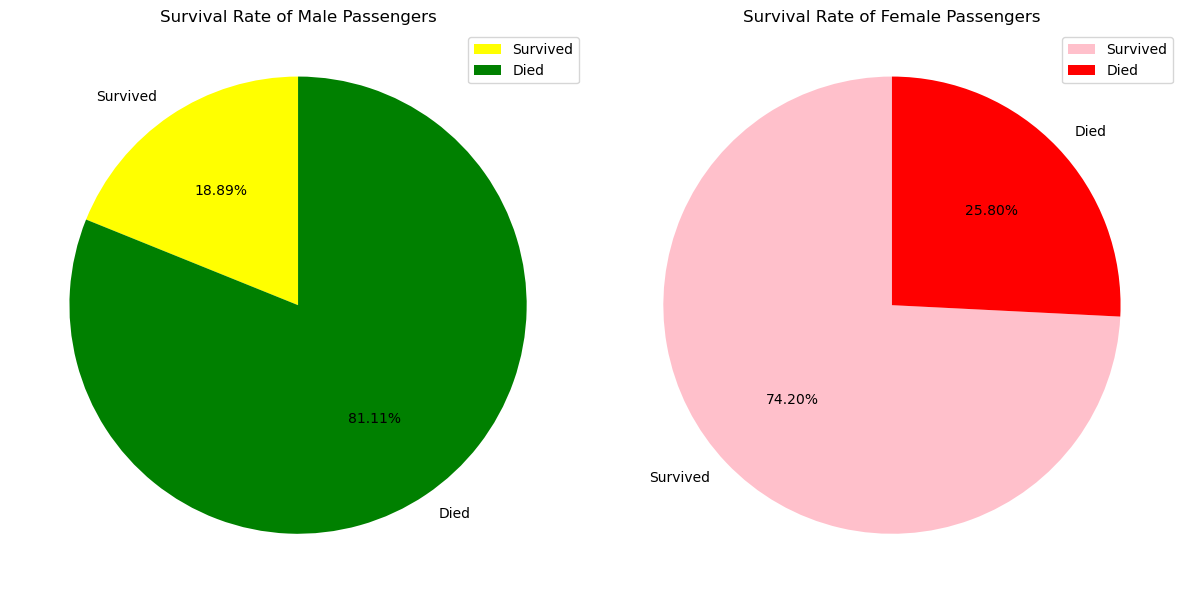

In [8]:
# total number of survived males
male_survival = survival_count_gender.loc['male', 1]
total_male = df['Gender'].value_counts()['male']

# total number of survived females
female_survival = survival_count_gender.loc['female', 1]
total_female = df['Gender'].value_counts()['female']

# creating subplots with 1 row and 2 columns, so that it shows both charts in the same line
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# pie chart for survival rate of male passengers
axes[0].pie([male_survival, total_male - male_survival], labels=['Survived', 'Died'], autopct='%2.2f%%', startangle=90, colors=['yellow', 'green'])
axes[0].set_title('Survival Rate of Male Passengers')
axes[0].axis('equal')
axes[0].legend(loc='upper right')

# pie chart for survival rate of female passengers
axes[1].pie([female_survival, total_female - female_survival], labels=['Survived', 'Died'], autopct='%2.2f%%', startangle=90, colors=['pink', 'red'])
axes[1].set_title('Survival Rate of Female Passengers')
axes[1].axis('equal')
axes[1].legend(loc='upper right')

plt.tight_layout() # to prevent overlapping of the charts
plt.show()



<b>Conclusion Q2</b>

Female passengers have a higher survival rate (74.20%) compared to survival rate of male passengers (18.89%)

<b>Question 3</b>: Show the survival numbers of male and female passengers, respectively. [6 marks]

In [9]:
print('Calculating survival count by gender: ')
print('Dead == 0; Survived == 1\n')

#survival count by gender
survival_count_gender = df.groupby(['Gender', 'Survived'])['Survived'].count().unstack()
print(survival_count_gender)

Calculating survival count by gender: 
Dead == 0; Survived == 1

Survived    0    1
Gender            
female     81  233
male      468  109


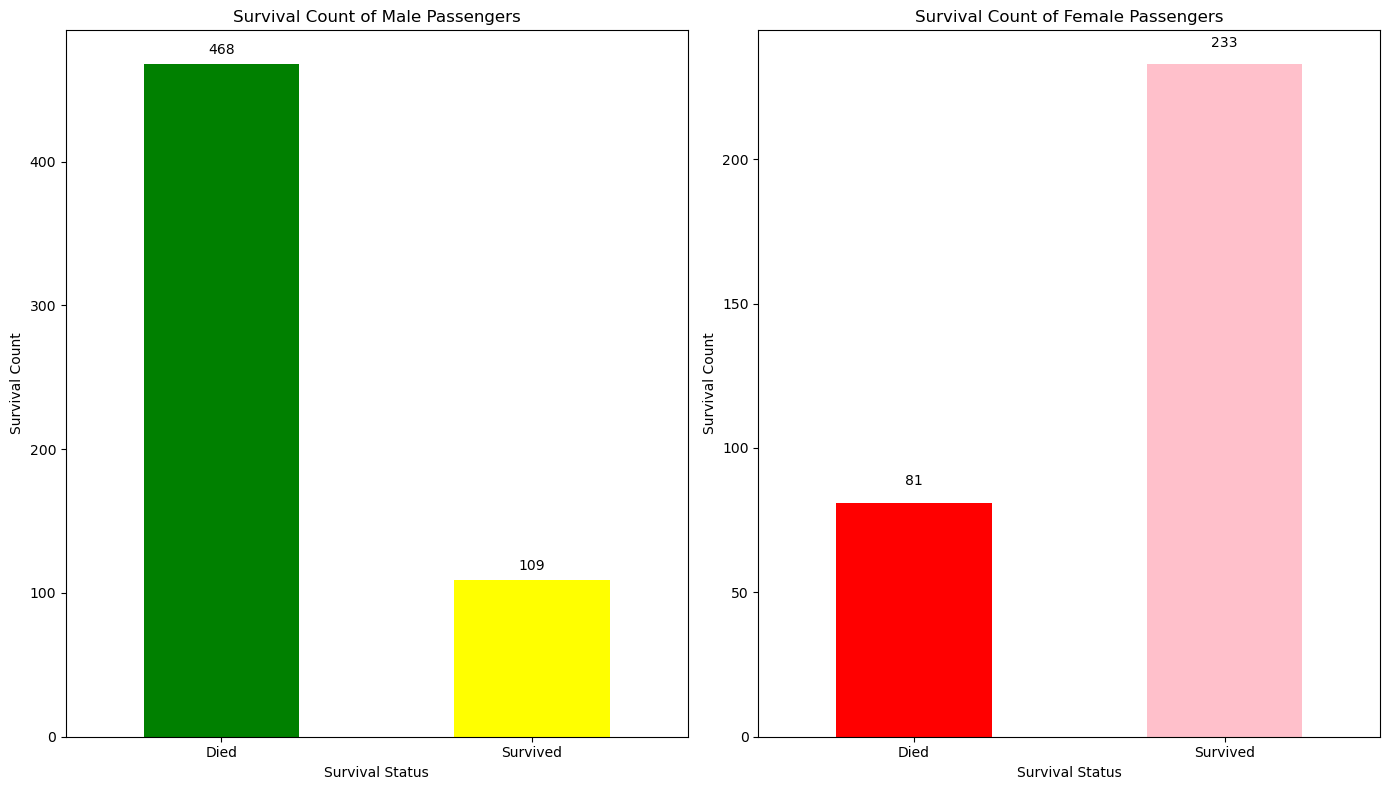

In [10]:
# creating subplots with 1 row and 2 columns to show both plots in the same line
fig, bars = plt.subplots(1, 2, figsize=(14, 8))

# bar graph for survival count of male passengers
plt.subplot(1, 2, 1)
male_counts = survival_count_gender.loc['male']
male_counts.plot(kind='bar', color=['green', 'yellow'])

# adding annotations to the bars
for i, val in enumerate(male_counts): # loops in each element of male_counts
    plt.text(i, val + 5, str(val), ha='center', va='bottom')

plt.title('Survival Count of Male Passengers')
plt.xlabel('Survival Status')
plt.ylabel('Survival Count')
plt.xticks([0, 1], ['Died', 'Survived'], rotation=0)

# bar graph for survival count of female passengers
plt.subplot(1, 2, 2)
female_counts = survival_count_gender.loc['female']
female_counts.plot(kind='bar', color=['red', 'pink'])

# adding annotations to the bars
for i, val in enumerate(female_counts): #loops in each element of female counts
    plt.text(i, val + 5, str(val), ha='center', va='bottom')

plt.title('Survival Count of Female Passengers')
plt.xlabel('Survival Status')
plt.ylabel('Survival Count')
plt.xticks([0, 1], ['Died', 'Survived'], rotation=0) 

plt.tight_layout() #prevent overlapping
plt.show()


<b>Conclusion Q3</b>

The survival number of male passengers are 109 survived and 468 died while the survival number of female passengers are 233 survived and 81 died

<b>Question 4</b>: What's the survival rates for male and female passengers in different classes, respectively? [8 marks]

In [11]:
#calculating survival count by gender in each classes, respectively
survival_count_by_gender_pclass = df.groupby(['Gender', 'Pclass', 'Survived']).size()

#calculating survival rate by gender
survival_rate_by_gender_pclass = (survival_count_by_gender_pclass / survival_count_by_gender_pclass.groupby(level=[0, 1]).sum() * 100).round(2)

print('Survival Rate by Gender in Each Class')
print('Died = 0; Survived = 1\n')
print(survival_rate_by_gender_pclass)

Survival Rate by Gender in Each Class
Died = 0; Survived = 1

Gender  Pclass  Survived
female  1       0            3.19
                1           96.81
        2       0            7.89
                1           92.11
        3       0           50.00
                1           50.00
male    1       0           63.11
                1           36.89
        2       0           84.26
                1           15.74
        3       0           86.46
                1           13.54
dtype: float64


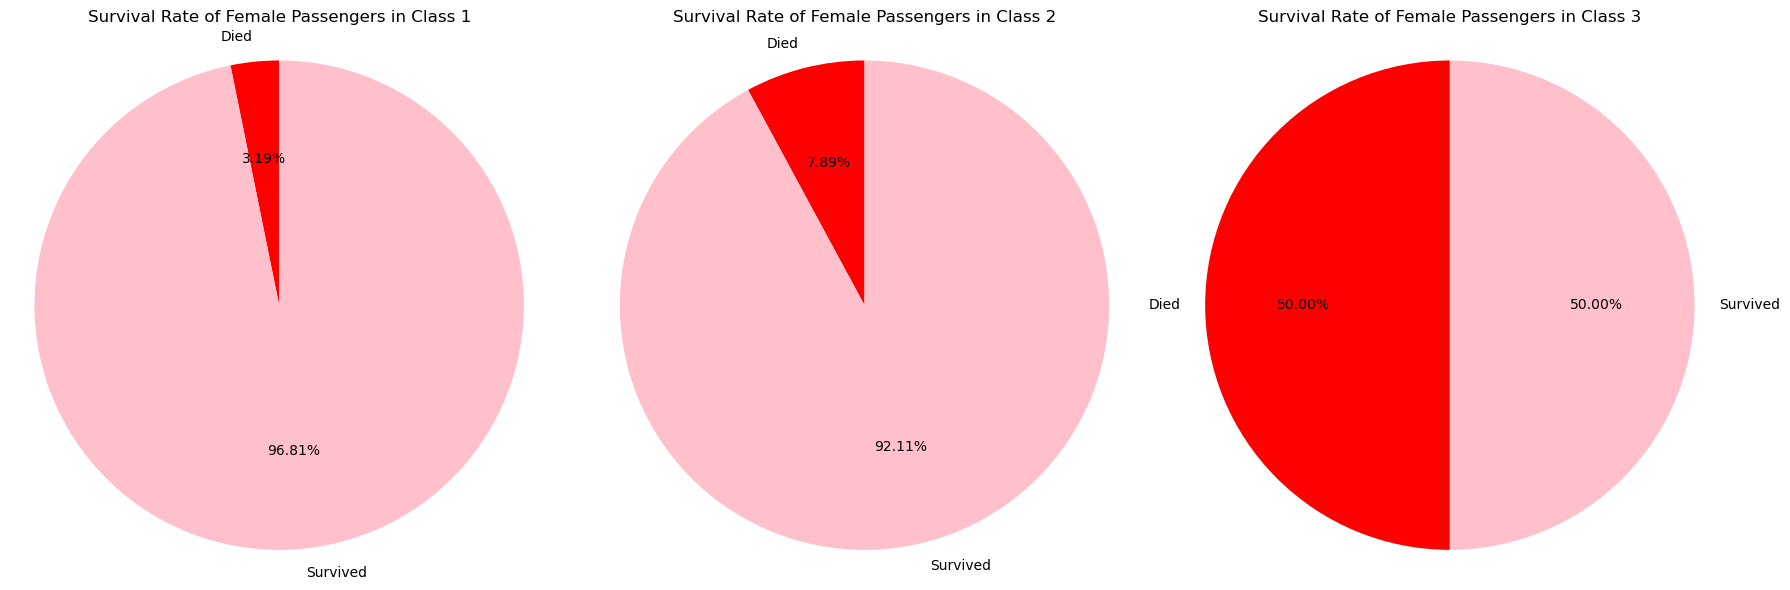

In [30]:
# selecting survival rates for female passengers in each class
female_survival_rates = survival_rate_by_gender_pclass.loc['female']

# initialize figure and axis for each class
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# loop through each class and plot a pie chart
for i, pclass in enumerate(range(1, 4), 1): 
    ax = axes[i - 1]
    ax.set_title(f'Survival Rate of Female Passengers in Class {pclass}')
    
    # plot pie chart for the current class
    ax.pie(female_survival_rates.loc[pclass], labels=['Died', 'Survived'], autopct='%2.2f%%', startangle=90, colors=['red', 'pink'])
    ax.axis('equal')

plt.tight_layout() #prevent overlapping
plt.show()


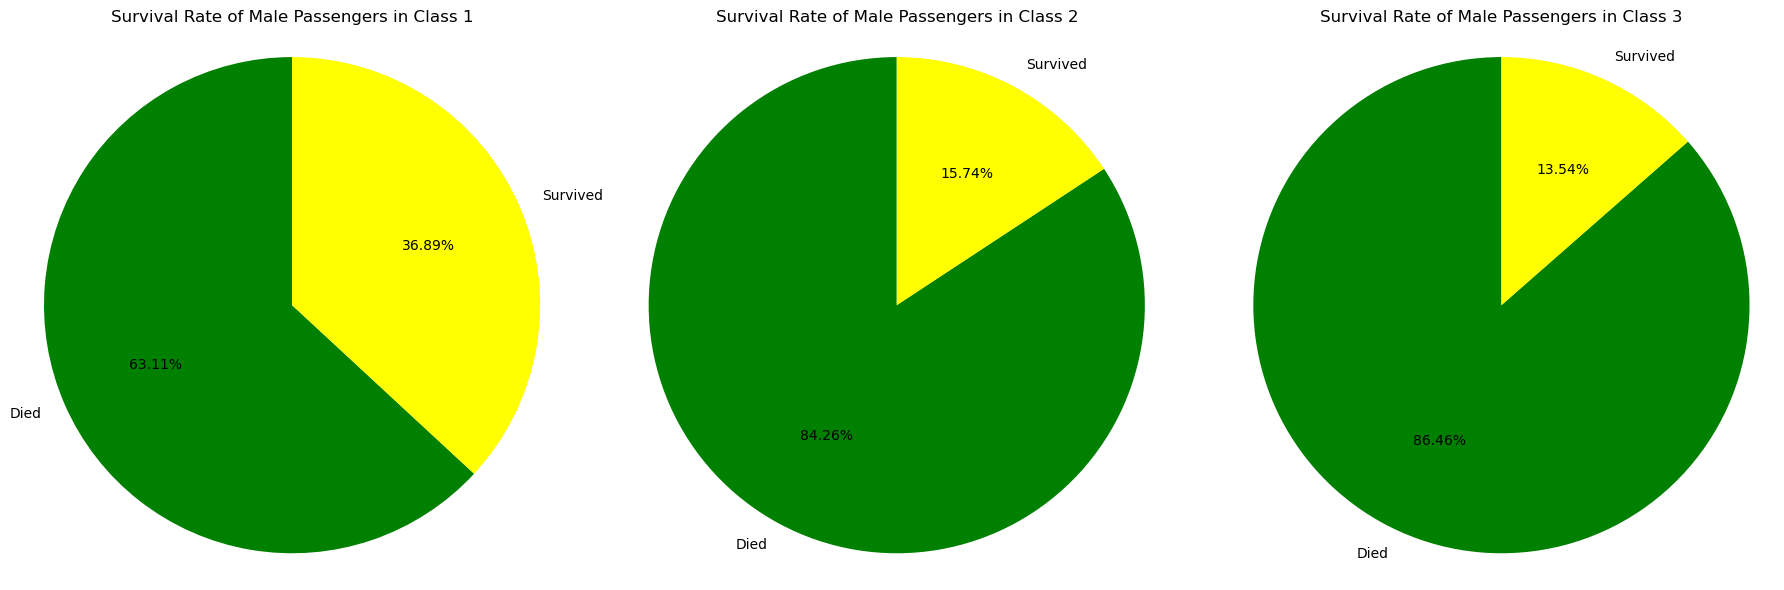

In [13]:
# selecting survival rates for male passengers in each class
male_survival_rates = survival_rate_by_gender_pclass.loc['male']

# initialize figure and axis for each class
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# loop through each class and plot a pie chart
for i, pclass in enumerate(range(1, 4), 1):
    ax = axes[i - 1]
    ax.set_title(f'Survival Rate of Male Passengers in Class {pclass}')
    
    # plot pie chart for the current class
    ax.pie(male_survival_rates.loc[pclass], labels=['Died', 'Survived'], autopct='%2.2f%%', startangle=90, colors=['green', 'yellow'])
    ax.axis('equal')

plt.tight_layout() #prevent overlapping
plt.show()


<b>Conclusion Q4</b>

The highest survival rates for female is in first class which then slowly decreases among the classes from 96.81% to 92.11% then 50.00%

The highest survival rates for male is in first class which then slowly decreases among the classes from 36.89% to 15.74% then 13.54%

<b>Question 5</b>: Did more female passengers die in class 3 than class 2? Explain the plot which supports the answer. [6 marks]

In [14]:
print("Number of female passengers died in each passenger class:\n")

#selecting number of female passengers died in each class from 'survival_count_by_gender_pclass'
print(survival_count_by_gender_pclass.loc[('female', slice(None),0)])

Number of female passengers died in each passenger class:

Pclass
1     3
2     6
3    72
dtype: int64


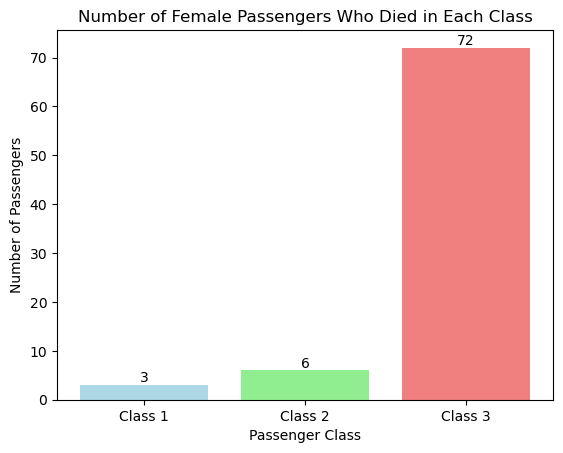

In [15]:
# filter the dataFrame for female passengers in classes 1, 2, and 3 who died
female_died_all_classes = df[(df['Gender'] == 'female') & (df['Survived'] == 0)]

# number of female passengers who died in each class
female_died_counts = female_died_all_classes.groupby('Pclass').size()

# plot bar chart for number of female passengers died in each class
bars = plt.bar(female_died_counts.index, female_died_counts.values, color=['lightblue', 'lightgreen', 'lightcoral']) 
# female_died_counts.index = x-axis
#female_died_counts.values = height of bar
plt.title('Number of Female Passengers Who Died in Each Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')

# adding annotations on top of the bars
for bar in bars: # loops in each bar
    height = bar.get_height() #gets bar height
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')
    #specifies the text should be placed at which x-coordinate (center of the bar), y-coordinate (height of the bar) and displayed (height of the bar)


plt.xticks(female_died_counts.index, labels=['Class 1', 'Class 2', 'Class 3'])
plt.show()


<b>Conclusion Q5</b>

More female passengers dies in class 3 (72 female passengers died) compared to class 2 (6 female passengers died)

<b>Question 6</b>: Plot the number of male passengers died in higher class (i.e. 1 & 2) and in lower class (i.e. 3). Did more male passengers die in higher classes than in lower class? [8 marks]

In [16]:
print("Number of male passengers died in each passenger class:\n")
print("Higher Class (Class 1 and Class 2):")
print("Lower Class (Class 3):\n")

# number of survived male passengers in each class
print(survival_count_by_gender_pclass.loc[('male', slice(None),0)])

Number of male passengers died in each passenger class:

Higher Class (Class 1 and Class 2):
Lower Class (Class 3):

Pclass
1     77
2     91
3    300
dtype: int64


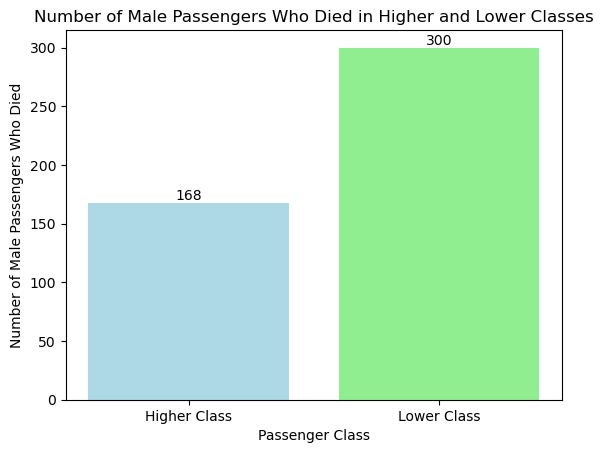

In [17]:
# filter dataFrame for male passengers who died in higher class (Class 1 and 2) and lower class (Class 3)
male_died_higher_class = df[(df['Gender'] == 'male') & (df['Pclass'].isin([1, 2])) & (df['Survived'] == 0)]
male_died_lower_class = df[(df['Gender'] == 'male') & (df['Pclass'] == 3) & (df['Survived'] == 0)]

# number of male passengers who died in higher class and lower class
male_died_counts = [male_died_higher_class.shape[0], male_died_lower_class.shape[0]]

# plot bar chart for male passengers who died in higher and lower classes
plt.bar(['Higher Class', 'Lower Class'], male_died_counts, color=['lightblue', 'lightgreen'])
plt.title('Number of Male Passengers Who Died in Higher and Lower Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Male Passengers Who Died')

# adding annotations on top of the bars
for i, count in enumerate(male_died_counts): #loops in each element of 'male_died_counts'
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

<b>Conclusion Q6</b>
Less male passengers died in higher classes (168 male passengers died) than in lower classes (300 male passengers died)

### Data pre-processing <a class="anchor" id="second-bullet"></a>

<b>Question 7</b>: What are the issues with this dataset? What should be done before the data can be used to build machine learning models? [6 marks]

In [18]:
#checking missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The above shows the number of missing values in dataset
- 'Embarked' has only 2 missing values
- 'Age' has 177 missing values
- 'Cabin' has 687 missing values 

Missing values of 'Cabin' are too high, hence we will need to drop it from the dataset

In [19]:
#checking number of duplicated records in dataset
duplicated = df.duplicated().sum()
print('Number of duplicated record(s): ', duplicated)

Number of duplicated record(s):  0


The above results shows that no duplicated records are in the dataset. Hence, we will not remove or modify anything from the dataset

In [20]:
print('Descriptive statistics of dataset: \n')
df.describe(include = 'all') #statistics details of dataset

Descriptive statistics of dataset: 



,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891.0,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681.0,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082.0,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7.0,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


- There's an outlier in 'Fare' because of the significant difference between 75th percentile (31.000000) , standard deviation (49.6934) and maximum value (512.3932)

- Most frequent entry in 'Embarked' is 'S'

In [21]:
# replace missing values with median in 'SibSp', 'Parch', 'Fare', and 'Age'
df["SibSp"].fillna(df['SibSp'].median(), inplace=True)
df["Parch"].fillna(df['Parch'].median(), inplace=True)
df["Fare"].fillna(df['Fare'].median(), inplace=True)
df["Age"].fillna(df['Age'].median(), inplace=True)

# replace missing values with 'S' in Embarked
df["Embarked"].fillna("S", inplace = True) 

# drop insignificant columns 'PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True) 

In [22]:
# convert gender(string into integer)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

#male =1, female =0

In [23]:
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


- 'PassengerId', 'Name', 'Ticket', 'Cabin' has succesully removed
- Gender has successfully converted from string (male, female) to integers (1,0)

<b> Conclusion Q7</b>
There are no duplicated items in the dataset. However, we have succesfully remove the insignificant element before building machine learning models
1. Column 'Cabin' is removed, since percentage of missing values are too high
2. Column 'PassengerId', 'Name', 'Ticket' are dropped, since it is irrelevant to model set
3. Empty entries are filled in with median values
4. Entries for column 'Embarked' are filled in with entry 'U', since it is the most frequent data of the column
5. Gender 'male' is converted to integer '1' and 'female' is converted to integer '0'


### Decision Tree

<b>Question 8</b>: Explain how a decision tree of depth 3 can be trained and evaluated. How accurate the decision tree model can classify a given passenger? [10 marks]

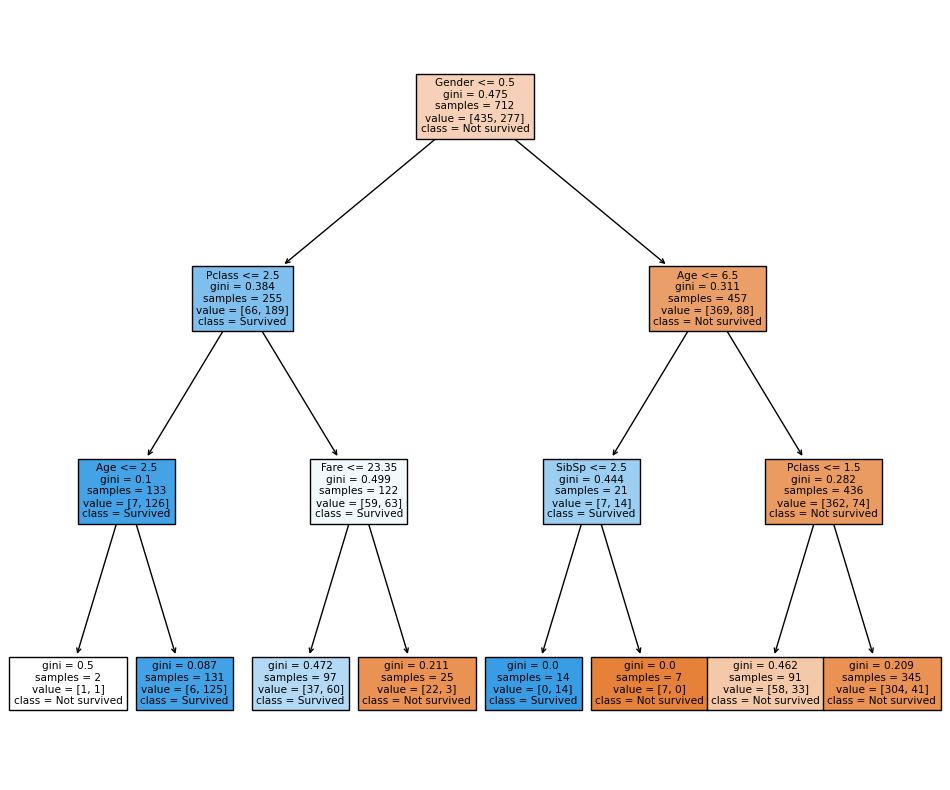

Accuracy on test set: 0.8156424581005587
Accuracy on training set: 0.8300561797752809
Cross-validation accuracy: 0.8148189762796504


In [24]:
# decide variables to use
X = df[['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

# split data into training and testing sets (80% training; 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

# train decision tree on training set
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

# visualising the decision tree
plt.figure(figsize=(12, 10))
tree.plot_tree(dt, feature_names=['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare'], class_names=['Not survived', 'Survived'], filled=True)
plt.show()

# evaluating test set
test_accuracy = dt.score(X_test, y_test)
print('Accuracy on test set:', test_accuracy)

# evaluating training set
train_accuracy = dt.score(X_train, y_train)
print('Accuracy on training set:', train_accuracy)

# cross-validation to evaluate model performance
cv_accuracy = cross_val_score(dt, X, y, cv=10, scoring='accuracy').mean()
print('Cross-validation accuracy:', cv_accuracy)


<b>Conclusion Q8</b>

Decision tree of depth 3 can be trained and evaluated by: 

1. Data preparation (decide variables to use)
- defining feature variables 'x' and target variable 'y'
- features including passenger attributes like Pclass, Gender, Age, SibSp, Parch and Fare
- target variable is survival of passenger

2. Training testing split
- splitting data into training and testing sets using 'train_test_split'
- trains the model on one portion of the data (training) and evaluate its performance on another unseen portion (testing)

3. Training the decision tree on training set
- initialize a decision tree by DecisionTreeClassifier with specified maximum depth of tree as 3
- train the model on the training data ('X_train' 'y_train')

4. Tree visualization
- plots the decision tree 

5. Evaluating model performance on testing set
- evaluates its performance on test set
- computes accuracy on training set to see how well the model fits the training data

6. Cross-Validation
- evaluates data more completely by the average accuracy accross all folds
- splits data into multiple folds
- trains the model on different combinations of training and testing sets 

81.56% of the testing set is correctly classified for a given passenger

<b>Question 9</b>: What's the best depth to build a decision tree classification model for the Titanic data? How accurate is the best decision tree? [10 marks]

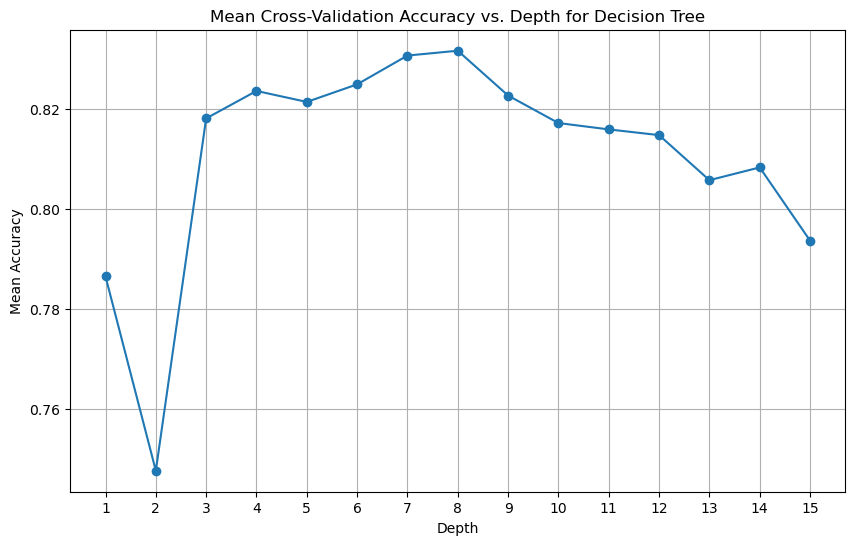

The best depth for the decision tree is 8 with an accuracy of 0.8316.


In [25]:
# decide variables to use
x = df[['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

# split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=65)

# initialize lists to store accuracies for different depths
depths = []
mean_accuracies = []

# Test depths from 1 to 15
for depth in range(1, 16):
    # train decision tree on training set
    dt = DecisionTreeClassifier(max_depth=depth)
    
    # perform cross-validation to have a more stable calculation of accuracy
    cv_scores = cross_val_score(dt, x, y, cv=35, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    
    # store results
    mean_accuracies.append(mean_accuracy)
    depths.append(depth)

# plot the accuracies for different depths
plt.figure(figsize=(10, 6))
plt.plot(depths, mean_accuracies, marker='o', linestyle='-')
plt.title('Mean Cross-Validation Accuracy vs. Depth for Decision Tree')
plt.xlabel('Depth')
plt.ylabel('Mean Accuracy')
plt.xticks(depths)
plt.grid(True)
plt.show()

# find the best depth based on the highest mean accuracy
best_depth = depths[mean_accuracies.index(max(mean_accuracies))]
best_accuracy = max(mean_accuracies)

print(f"The best depth for the decision tree is {best_depth} with an accuracy of {best_accuracy:.4f}.")

<b>Conclusion Q9</b>

The best depth to build a decision tree classification model for the Titanc data is 8 with an accuracy of approximately 83%

### Neural Networks

<b>Question 10</b>: How accurate a neural network can classify a given passenger? [10 marks]

In [26]:
# decide variables to use
X = df[['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

# split data into training and testing sets (training 80%, testing 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=3000, random_state=42)
mlp.fit(X_train, y_train)

# predict on the testing set
y_pred_test = mlp.predict(X_test)
print('Testing accuracy:', accuracy_score(y_test, y_pred_test))

# predict on the training set
y_pred_train = mlp.predict(X_train)
print('Training accuracy:', accuracy_score(y_train, y_pred_train))

# perform cross-validation
cv_accuracy = cross_val_score(mlp, X, y, cv=10, scoring='accuracy').mean()
print('Cross-validation accuracy:', cv_accuracy)

Testing accuracy: 0.7821229050279329
Training accuracy: 0.827247191011236
Cross-validation accuracy: 0.6702122347066167


<b>Conclusion Q10</b>

78.21% of the testing set is correctly classified in neural network

<b>Question 11</b>: Where are the errors (inaccuracy) incurred with the neural network, i.e. classifying survived or died passengers? [10 marks]

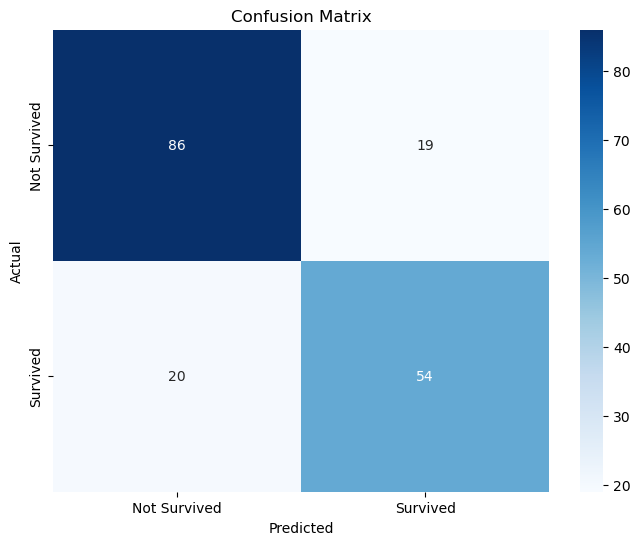

In [27]:
# Define class labels
class_labels = ['Not Survived', 'Survived']
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<b>Conclusion Q11</b>

By using the confusion-matrix, we can locate the specific errors (inaccuracy) incurred with the neural network 

In the confusion matrix:
- The top-left cell represents True Negatives (passengers correctly classified as not survive)
- The top-right cell represents False Positives (passengers incorrectly classified as survived when they actually did not survive)
- The bottom-left cell represents False Negatives (passengers incorrectly classified as not survived when they actually survived)
- The bottom-right cell represents True Positives (passengers correctly classified as survived)


- There are 86 True Negatives, meaning 86 passengers were correctly classified as not survived.
- There are 19 False Positives, meaning 19 passengers were incorrectly classified as survived when they actually did not survive.
- There are 20 False Negatives, meaning 20 passengers were incorrectly classified as not survived when they actually survived.
- There are 54 True Positives, meaning 54 passengers were correctly classified as survived.


In summary, the inaccuracy in the neural network model mainly comes from:
1. False Positives (with 19 misclassification)
2. False Negatives (with 20 misclassification) 

<b>Question 12</b>: Which of the decision tree and neural network model is better in terms of the overall accuracy? [10 marks]

In [28]:
# define variables and target
X = df[['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

# initialize decision tree and neural network classifiers
dt_classifier = DecisionTreeClassifier(max_depth=3)
nn_classifier = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=3000, random_state=42)

# perform cross-validation to evaluate decision tree model
dt_cv_scores = cross_val_score(dt_classifier, X, y, cv=10)

# perform cross-validation to evaluate neural network model
nn_cv_scores = cross_val_score(nn_classifier, X, y, cv=10)

# calculate mean accuracy scores
dt_mean_accuracy = np.mean(dt_cv_scores)
nn_mean_accuracy = np.mean(nn_cv_scores)

# print the mean accuracy scores
print("Mean Accuracy of Decision Tree Classifier:", dt_mean_accuracy)
print("Mean Accuracy of Neural Network Classifier:", nn_mean_accuracy)


Mean Accuracy of Decision Tree Classifier: 0.8148189762796504
Mean Accuracy of Neural Network Classifier: 0.6702122347066167


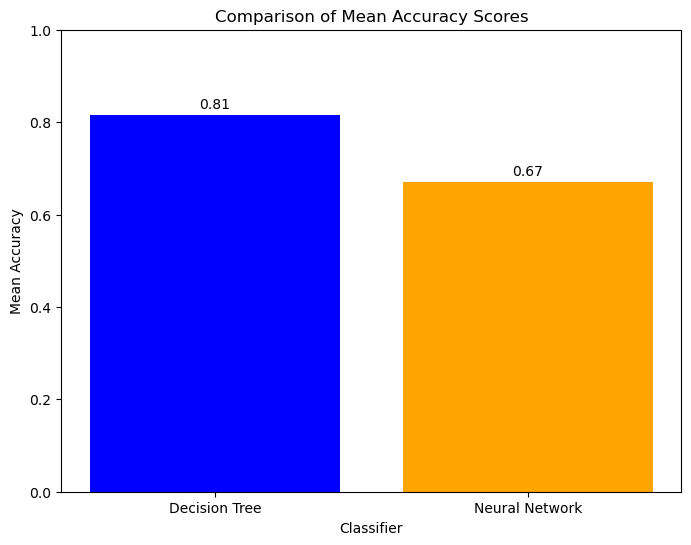

In [29]:
# define classifiers and their mean accuracy scores
classifiers = ['Decision Tree', 'Neural Network']
mean_accuracies = [dt_mean_accuracy, nn_mean_accuracy]

# plot the mean accuracy scores
plt.figure(figsize=(8, 6))
bars = plt.bar(classifiers, mean_accuracies, color=['blue', 'orange'])

# adding annotations to the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate('%.2f' % height,
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('Classifier')
plt.ylabel('Mean Accuracy')
plt.title('Comparison of Mean Accuracy Scores')
plt.ylim(0.0, 1.0)
plt.show()


<b>Conclusion Q12</b>

Decision tree is a better model in terms of accuracy, since the mean accuracy score of decision tree (81%) is higher than neural network (67%)